# Logistic Regression From Scratch #

This is a summary of the post from
[beckernick](https://beckernick.github.io/logistic-regression-from-scratch/). I thought this was a great post and goes into some basic detail about the logistic regression process. I made this so I can have a refresher around when I get the ML itch.

Generate the data from a multivariate normal distribution.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75], [.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75], [.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1,x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations), np.ones(num_observations)))

This is how the data looks

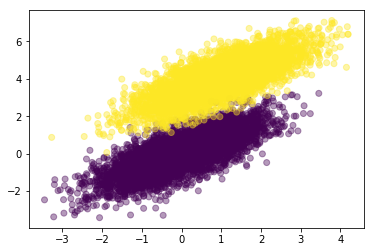

In [13]:
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1], c = simulated_labels, alpha = 0.4)

Linear models usually transform a linear model of predictors via the Link function.

**[Link Function](https://en.wikipedia.org/wiki/Generalized_linear_model#Link_function)**: Provides a relationship between the linear predictor and the mean of the distribution function.

For logistic regression, the [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) link function is used.

In [15]:
def sigmoid (scores):
    return 1 / (1 + np.exp(-scores))

In order to maximize the likelihood, there needs to be equations and gradients of the likelihood. For binary classification, this can be reduced using the log-likelihood. This can be done without affecting the weights parameter estimations because log transformations are monotonic.

Links on how to derive these equations:
- [Coursera](https://www.coursera.org/learn/ml-classification/lecture/1ZeTC/very-optional-expressing-the-log-likelihood)

The log-likelihood can be viewed as a sum over all the training data:

\begin{equation*}
 u = \sum_{i=1}^N y_i \beta^T x_i- log(1 + exp(\beta^T  x_i))
\end{equation*}

The meaning:

\begin{equation*} 
y 
\end{equation*} 
the target class (0 or 1)

\begin{equation*} 
x_i 
\end{equation*} 
is an individual data point

\begin{equation*} 
beta 
\end{equation*}
is the weights vector


In [18]:
def log_likelihood (features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum ( target * scores - np.log(1 + np.exp(scores)))
    return ll

In order to calculate the gradient is just taking the derivative of the above equation. This becomes:

\begin{equation*}
\nabla u = X^T (Y - Predictions)
\end{equation*}

We don't even need a wrapper function for this.

For the logistic regression function model, we will add the option for the model with an intercept.

In [22]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
        if add_intercept:
            intercept = np.ones((features.shape[0], 1))
            features = np.hstack((intercept, features))
            
        weights = np.zeros(features.shape[1])
        
        for step in range(num_steps):
            scores = np.dot(features, weights)
            predictions = sigmoid(scores)
            
            output_error_signal = target - predictions
            gradient = np.dot(features.T, output_error_signal)
            weights += learning_rate * gradient
            
            if step % 10000 == 0:
                print (log_likelihood(features, target, weights))
            
        return weights

Now run the model.

In [25]:
weights = logistic_regression(simulated_separableish_features, simulated_labels,
                             num_steps = 300000, learning_rate = 5e-5, add_intercept=True)


-4346.26477915
-148.706722768
-142.964936231
-141.545303072
-141.060319659
-140.870315859
-140.790259128
-140.755050023
-140.739145032
-140.731834989
-140.728436667
-140.726844713
-140.72609509
-140.725740861
-140.725573069
-140.725493458
-140.725455643
-140.725437666
-140.725429116
-140.725425048
-140.725423112
-140.72542219
-140.725421751
-140.725421543
-140.725421443
-140.725421396
-140.725421373
-140.725421362
-140.725421357
-140.725421355


Compare with Sk-Learn's Logistic Regression algorithm. We have to set C=1e15 in order to turn off regularization.

In [26]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(simulated_separableish_features, simulated_labels)

print(clf.intercept_, clf.coef_)
print(weights)

[-13.99400797] [[-5.02712572  8.23286799]]
[-14.09225541  -5.05899648   8.28955762]


The weights nearly match. With longer training and a sufficiently small learning rate, they would match perfectly.

For computing the accuracy, we need the final weights and to get the logits for the dataset. Then we can use the sigmoid function to get the final predictions and round them to the nearest integer.

In [30]:
data_with_intercept = np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                simulated_separableish_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print ('Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))
print ('Accuracy from sk-learn: {0}'.format(clf.score(simulated_separableish_features,simulated_labels)))

Accuracy from scratch: 0.9948
Accuracy from sk-learn: 0.9948


Almost perfect. This makes sense since the data is easy to classify. The blue points are the successful predictions. Other colors are bad predictitons. 

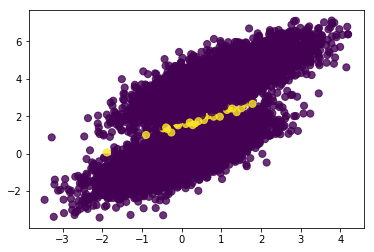

In [33]:
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
           c = preds == simulated_labels - 1, alpha = .8, s = 50)

The from scratch solution is significantly slower because sklearn uses a highly optimized resolver.